In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv('tesla.csv')

In [4]:
dataset.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000


In [5]:
dataset.shape

(1692, 7)

In [6]:
dataset.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [8]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Data Preprocessing

In [9]:
dataset['Prediction'] = dataset['Close'].shift(-1)

In [10]:
dataset=dataset.dropna()

In [11]:
dataset.head(8)

,Date,Open,High,Low,Close,Volume,Adj Close,Prediction
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999,23.830000
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000,21.959999
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999,19.200001
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001,16.110001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001,15.800000
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000,17.459999
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999,17.400000
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,4050600,17.400000,17.049999


In [12]:
dataset.drop(['Adj Close'], axis=1, inplace=True)

In [13]:
# Ensure Date is formatted correctly for plotting
dataset['Date'] = pd.to_datetime(dataset['Date'])

### Data Visualization

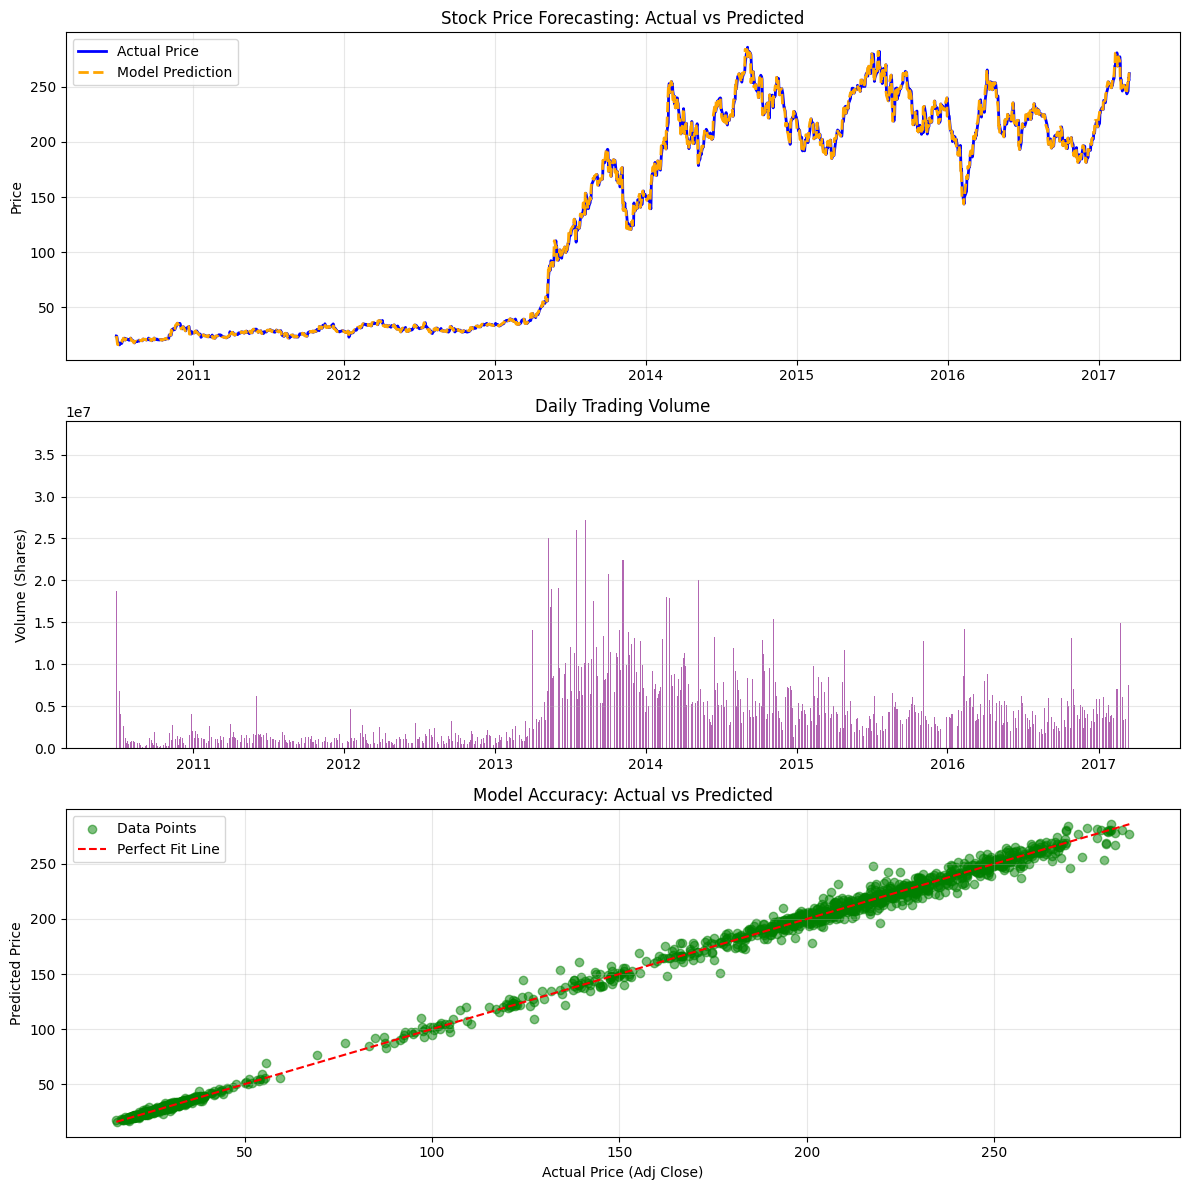

In [14]:
# Create a figure with 3 subplots (stacked vertically)
plt.figure(figsize=(12, 12))
# --- Plot 1: Actual vs Predicted Price ---
plt.subplot(3, 1, 1) # (3 rows, 1 column, position 1)
plt.plot(dataset['Date'], dataset['Close'], label='Actual Price', color='blue', linewidth=2)
plt.plot(dataset['Date'], dataset['Prediction'], label='Model Prediction', color='orange', linestyle='--', linewidth=2)
plt.title('Stock Price Forecasting: Actual vs Predicted')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Plot 2: Trading Volume ---
plt.subplot(3, 1, 2) # (3 rows, 1 column, position 2)
plt.bar(dataset['Date'], dataset['Volume'], color='purple', alpha=0.6)
plt.title('Daily Trading Volume')
plt.ylabel('Volume (Shares)')
plt.grid(True, axis='y', alpha=0.3)

# --- Plot 3: Accuracy Check (Scatter Plot) ---
plt.subplot(3, 1, 3) # (3 rows, 1 column, position 3)
plt.scatter(dataset['Close'], dataset['Prediction'], alpha=0.5, color='green', label='Data Points')

# Draw a red "Perfect Prediction" line
min_val = min(dataset['Close'].min(), dataset['Prediction'].min())
max_val = max(dataset['Close'].max(), dataset['Prediction'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit Line')

plt.title('Model Accuracy: Actual vs Predicted')
plt.xlabel('Actual Price (Adj Close)')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

In [15]:
# Set it as the index
dataset.set_index('Date', inplace=True)

### Model Creation

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.pipeline import Pipeline

In [17]:
input_data=dataset.drop('Prediction' ,axis=1)
output=dataset['Prediction']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output, test_size=0.23, random_state=42)

In [19]:
Lr_Pipeline=Pipeline(
    [
        ('st' , StandardScaler()),
        ('lr' ,LinearRegression())
    ]
)

In [20]:
Lr_Pipeline.fit(X_train,y_train)

,steps,"[('st', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [21]:
lr_pred=Lr_Pipeline.predict(X_test)

In [22]:
print("Mean Absolute Error" , mean_absolute_error(lr_pred,y_test))
print("Mean Squared Error" , mean_squared_error(lr_pred,y_test))
print("R2 Score" , r2_score(lr_pred,y_test)*100)

Mean Absolute Error 2.6624210192821605
Mean Squared Error 21.75795371640447
R2 Score 99.76089401488031


In [28]:
import pickle
import os

# 1. Define the filename (matching the one you tried to load earlier)
filename = 'Lr_Pipeline.pkl'

# 2. Save the model
# 'wb' = Write Binary (Required for saving pickles)
with open(filename, 'wb') as file:
    pickle.dump(Lr_Pipeline, file)

print(f"✅ Success! Model saved as '{filename}'")

# 3. Verify it was actually created
print("Current directory files:", os.listdir())

✅ Success! Model saved as 'Lr_Pipeline.pkl'
Current directory files: ['.ipynb_checkpoints', 'app.py', 'Lr_Pipeline.pkl', 'tesla.csv', 'Tesla.ipynb']
